# 1. Importing All required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. Loading data-set and spliting into dependent and independent featues.

## 2.1 Loading the train-dataset.

In [2]:
df = pd.read_csv("../data/train.csv")
df.head(2)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


## 2.2 Loading the test-dataset.

In [3]:
test_df = pd.read_csv("../data/test.csv")
test_df.head(2)

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761


## 2.3 Splitting the train-data into dependent and inde-dependent features.

In [4]:
x = df.drop(columns=["id","target"])
y = df.target
print("Shape of input data: ", x.shape)
print("*"*50)
print("Shape of target data: ", y.shape)
print("*"*50)
print("Unique values in the target: ", y.unique())

Shape of input data:  (250, 300)
**************************************************
Shape of target data:  (250,)
**************************************************
Unique values in the target:  [1. 0.]


# 3. Feature Engineering

## 3.1 Finding feature groups.

**So, the idea of this feature engineering technique is there are gropus of similar features, and it considers a good idea to generate new features based on these groups by calculating some statstic on these groups.** 

[]

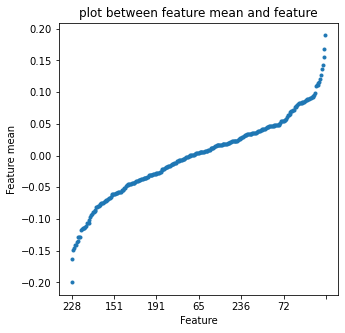

In [5]:
fig = plt.figure(figsize=(5,5))

x.mean().sort_values().plot(style = ".")
plt.title("plot between feature mean and feature")
plt.xlabel("Feature")
plt.ylabel("Feature mean")
plt.plot()

In [6]:
((x.mean().sort_values()[11:288]))

## first group: 11:288
## second group: 2:11
## third group: 288:293
## fourth group: 293: 295

74    -0.117244
119   -0.116228
66    -0.114680
147   -0.113868
175   -0.113800
         ...   
251    0.092040
233    0.092460
34     0.093852
186    0.095228
282    0.098476
Length: 277, dtype: float64

### Observation(s):
- There is one big group of 277 similar features observed in the above plot.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  45]
 [  1 101]
 [  2  22]
 [  3  40]
 [  4  42]]


In [8]:
def feature_engg(df,data):
    """
    Genrating new features by computing stats on the feature group/ similar features.
    """
    statistics  = pd.DataFrame()
    
    statistics["mean"] = df.mean(axis=1)
    statistics["kurt"] = df.kurt(axis=1)
    statistics["mad"] =  df.mad(axis=1)
    statistics["median"] =  df.median(axis=1)
    statistics["max"] =  df.max(axis=1)
    statistics["min"] =  df.min(axis=1)
    statistics["skew"] =  df.skew(axis=1)
    statistics["sem"] =  df.sem(axis=1)
    
    # clustering the whole data into 5 clusters and using cluster values as FE.
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
    statistics["cluster_values"] = kmeans.labels_
    
    # computing min, max and mean of instances to their 5-NN as FE
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors()
    neigh.fit(df)
    dists, _ = neigh.kneighbors(df, n_neighbors=5)
    dists = np.delete(dists, 0, 1)
    statistics['minDist'] = dists.mean(axis=1)
    statistics['maxDist'] = dists.max(axis=1)
    statistics['meanDist'] = dists.min(axis=1)

    X = pd.concat([data, statistics], axis=1)
    return X

In [10]:
fe_1 = feature_engg(x.loc[:,list(x.mean().sort_values()[11:288].index)],x)
fe_1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,mad,median,max,min,skew,sem,cluster_values,minDist,maxDist,meanDist
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.910098,-0.057,2.929,-2.851,0.016958,0.066556,2,22.946820,23.109234,22.616754
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,0.774677,0.066,2.907,-2.771,-0.132574,0.058468,2,21.238207,21.376524,20.940463


In [11]:
test_fe_1 = feature_engg(test_df.drop(columns=["id"]).loc[:,list(x.mean().sort_values()[11:288].index)],test_df.drop(columns=["id"]))
test_fe_1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,mad,median,max,min,skew,sem,cluster_values,minDist,maxDist,meanDist
0,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,...,0.794220,0.262,3.472,-2.174,0.102823,0.058687,1,20.065607,20.316209,19.764365
1,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,...,0.850657,-0.052,2.639,-3.138,0.041626,0.062853,4,20.888684,21.067379,20.701981


In [12]:
fe_2 = feature_engg(x,x)
fe_2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,mad,median,max,min,skew,sem,cluster_values,minDist,maxDist,meanDist
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.892740,-0.0505,2.929,-2.851,0.037492,0.062883,1,23.642639,23.882662,23.158032
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,0.788005,0.0745,2.907,-2.771,-0.214699,0.056917,3,22.462934,22.635361,22.343140


In [13]:
test_fe_2 = feature_engg(test_df.drop(columns=["id"]),test_df.drop(columns=["id"]))
test_fe_2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,mad,median,max,min,skew,sem,cluster_values,minDist,maxDist,meanDist
0,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,...,0.793762,0.2175,3.472,-2.628,0.035823,0.056743,3,21.416977,21.504622,21.248050
1,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,...,0.850026,-0.0455,2.639,-3.138,-0.018248,0.060466,0,21.848598,21.951837,21.702516


# 4. Modeling

## 4.1 Helper Funtions


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import QuantileRegressor


def modelling(model,model_name,params,X,y,test_data,test_ids,file):
    """
    
    """
    print("*"*100)
    print("Applying {0}....".format(model_name))
    grid_search = GridSearchCV(estimator=model,param_grid=params,cv=10,n_jobs=-1,scoring="roc_auc")
    grid_search.fit(X,y)
    print("Best Hyper-parameters achieved: ", grid_search.best_params_)
    # predicting train values with the best-estimator:
    if model_name in ["logistic_regression","svm"]:
        y_pred = grid_search.best_estimator_.predict_proba(X)[:,1]
    else:
        y_pred = grid_search.best_estimator_.predict(X)
        
    score = roc_auc_score(y,y_pred)
    print("ROC achieved on train set using {0}: ".format(model_name), score)
    # predicting test values with the best-estimator
    print("Predicting on test data and saving the results.")
    if model_name in ["logistic_regression","svm"]:
        pred  = grid_search.best_estimator_.predict_proba(test_data)[:,1]
    else:
        pred = grid_search.best_estimator_.predict(test_data)
        
    submission = pd.DataFrame({'id':test_ids,'target':pred})
    submission.to_csv("{0}/submission_{1}.csv".format(file,model_name),index = False)
    print("DONE!!")
    print("*"*100)
    print()
    print()
    
    
def apply_models(X,y,test_data,test_ids,file):
    """
    
    """
    
    # define Models
    
    ## Lasso Regression
    params = {"alpha":np.arange(0,1.01,0.01)}
    model = linear_model.Lasso()
    modelling(model,"Lasso_Regression",params,X,y,test_data,test_ids,file)
    
    
    ## Ridge Regression
    model = linear_model.Ridge()
    modelling(model,"Ridge_Regression",params,X,y,test_data,test_ids,file)
    
    ## Elastic Net Regression
    params_en = {"alpha":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
                "l1_ratio":np.arange(0,1.01,0.01)}
    model = linear_model.ElasticNet()
    modelling(model,"ElasticNet_Regression",params_en,X,y,test_data,test_ids,file)
    
    ## LASSOCV Regression
    print("*"*100)
    print("Applying LASSOCV Regression...")
    model = linear_model.LassoCV(cv=10,n_jobs=-1).fit(X,y)
    # predicting train values with the best-estimator:
    y_pred = model.predict(X)
    score = roc_auc_score(y,y_pred)
    print("ROC achieved on train set using LASSOCV is: ", score)
    # predicting test values with the best-estimator
    print("Predicting on test data and saving the results.")
    pred  = model.predict(test_data)
    submission = pd.DataFrame({'id':test_ids,'target':pred})
    submission.to_csv("{0}/submission_LASSOCV.csv".format(file),index = False)
    print("DONE!!")
    print("*"*100)
    print()
    print()
    
    ## LARSCV Regression
    print("*"*100)
    print("Applying LARSCV Regression...")
    model = linear_model.LarsCV(cv=10,n_jobs=-1).fit(X,y)
    # predicting train values with the best-estimator:
    y_pred = model.predict(X)
    score = roc_auc_score(y,y_pred)
    print("ROC achieved on train set using LARSCV is: ", score)
    # predicting test values with the best-estimator
    print("Predicting on test data and saving the results.")
    pred  = model.predict(test_data)
    submission = pd.DataFrame({'id':test_ids,'target':pred})
    submission.to_csv("{0}/submission_LARSCV.csv".format(file),index = False)
    print("DONE!!")
    print("*"*100)
    print()
    print()
    
    ## Bayesian Ridge Regression
    print("*"*100)
    print("Applying Bayesian Ridge Regression...")
    model = linear_model.BayesianRidge().fit(X,y)
    # predicting train values with the best-estimator:
    y_pred = model.predict(X)
    score = roc_auc_score(y,y_pred)
    print("ROC achieved on train set using bayesian ridge is: ", score)
    # predicting test values with the best-estimator
    print("Predicting on test data and saving the results.")
    pred  = model.predict(test_data)
    submission = pd.DataFrame({'id':test_ids,'target':pred})
    submission.to_csv("{0}/submission_bayesian_ridge.csv".format(file),index = False)
    print("DONE!!")
    print("*"*100)
    print()
    print()
    
    ## ARD Regression
    print("*"*100)
    print("Applying ARD Regression...")
    model = linear_model.ARDRegression().fit(X,y)
    # predicting train values with the best-estimator:
    y_pred = model.predict(X)
    score = roc_auc_score(y,y_pred)
    print("ROC achieved on train set using ARD Regression is: ", score)
    # predicting test values with the best-estimator
    print("Predicting on test data and saving the results.")
    pred  = model.predict(test_data)
    submission = pd.DataFrame({'id':test_ids,'target':pred})
    submission.to_csv("{0}/submission_ard_regression.csv".format(file),index = False)
    print("DONE!!")
    print("*"*100)
    print()
    print()
    ## Gaussian NB
    param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    model = GaussianNB()
    modelling(model,"Gaussian_NB",param_grid_nb,X,y,test_data,test_ids,file)
    
    ## Logistic Regression
    params_lr = {"penalty":["l1","l2"], "C":[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
                "class_weight":["balanced",None]}
    lr = LogisticRegression(solver = "liblinear")
    
    modelling(lr,"logistic_regression",params_lr,X,y,test_data,test_ids,file)
    
    ## SVM
    params_svc = {"kernel":["rbf","poly","linear"], "C":[0.000001, 0.00001,0.0001,0.001,0.01,0.1,1,10,100],
                 "class_weight":["balanced",None]}
    svc = SVC()
    modelling(svc,"svc",params_svc,X,y,test_data,test_ids,file)
    
    ## huber regressor
    
    params_huber = {"epsilon":[1, 1,35, 1.5, 1.75, 1.9]}
    huber = linear_model.HuberRegressor()
    modelling(huber,"huber_regressor",params_huber,X,y,test_data,test_ids,file)
    
    

## 4.2  Modelling on train data wihout any pre-processing.

In [33]:
apply_models(x,y,test_df.drop(columns=["id"]),test_df.id.values,"modelling_on_train_data")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.06}
ROC achieved on train set using Lasso_Regression:  0.883888888888889
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.97}
ROC achieved on train set using Ridge_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 1.0, 'l1_ratio': 0.03

### Results & Oberservation(s)

In [15]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
x.add_row(["Lasso Regression", 0.88,0.832])
x.add_row(["Ridge Regression", 0.97,0.631])
x.add_row(["ElasticNet Regression", 0.98,0.827])
x.add_row(["LASSOCV regression", 0.97, 0.845])
x.add_row(["LARSCV",0.99,0.83])
x.add_row(["Bayesian Ridge regression ", 1.0, 0.74])
x.add_row(["ARD regression", 1.0, 0.64])
x.add_row(["Guassian NB", 1.0, 0.66])
x.add_row(["Logistic regression", 0.95, 0.843])

x.add_row(["SVC", 1.0, 0.66])
x.add_row(["huber_regressor", 0.99, 0.643])

print(x)



+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         0.88        |       0.832        |
|      Ridge Regression      |         0.97        |       0.631        |
|   ElasticNet Regression    |         0.98        |       0.827        |
|     LASSOCV regression     |         0.97        |       0.845        |
|           LARSCV           |         0.99        |        0.83        |
| Bayesian Ridge regression  |         1.0         |        0.74        |
|       ARD regression       |         1.0         |        0.64        |
|        Guassian NB         |         1.0         |        0.66        |
|    Logistic regression     |         0.95        |       0.843        |
|            SVC             |         1.0         |        0.66        |
|      huber_regressor       |        

- Best roc-auc score achieved by **LASSOCV : 0.845** and **logistic regression: 0.843**.

## 4.3 Modelling on FE data with computing statistics on 1- feature group.

In [182]:
apply_models(fe_1,y,test_fe_1,test_df.id.values,"modelling_on_fe_data")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.03}
ROC achieved on train set using Lasso_Regression:  0.981388888888889
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.98}
ROC achieved on train set using Ridge_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.1, 'l1_ratio': 0.09

### Results & Observation(s)

In [183]:
table = PrettyTable()

table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 0.981,0.843])
table.add_row(["Ridge Regression", 0.98,0.630])
table.add_row(["ElasticNet Regression", 1.0,0.77])
table.add_row(["LASSOCV regression", 0.96, 0.845])
table.add_row(["LARSCV",0.94,0.847])
table.add_row(["Bayesian Ridge regression ", 1.0, 0.74])
table.add_row(["ARD regression", 1.0, 0.634])
table.add_row(["Guassian NB", 0.96, 0.66])
table.add_row(["Logistic regression", 0.96, 0.846])
table.add_row(["SVC", 1.0, 0.66])
table.add_row(["huber_regressor", 1.0, 0.695])

print(table)


+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |        0.981        |       0.843        |
|      Ridge Regression      |         0.98        |        0.63        |
|   ElasticNet Regression    |         1.0         |        0.77        |
|     LASSOCV regression     |         0.96        |       0.845        |
|           LARSCV           |         0.94        |       0.847        |
| Bayesian Ridge regression  |         1.0         |        0.74        |
|       ARD regression       |         1.0         |       0.634        |
|        Guassian NB         |         0.96        |        0.66        |
|    Logistic regression     |         0.96        |       0.846        |
|            SVC             |         1.0         |        0.66        |
|      huber_regressor       |        

- Result is almost same as previous modelling results.
- Best roc score achived by **LARSCV: 0.847** on test data.

## 4.4 Modelling on FE data with computing statistics on whole train data.

In [187]:
apply_models(fe_2,y,test_fe_2,test_df.id.values,"modelling_on_fe_2_data")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.04}
ROC achieved on train set using Lasso_Regression:  0.9570833333333334
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 1.0}
ROC achieved on train set using Ridge_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 1.0, 'l1_ratio': 0.03

In [188]:
table = PrettyTable()

table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 0.95,0.847])
table.add_row(["Ridge Regression", 1.0,0.633])
table.add_row(["ElasticNet Regression", 0.98,0.827])
table.add_row(["LASSOCV regression", 0.97, 0.845])
table.add_row(["LARSCV",0.95,0.831])
table.add_row(["Bayesian Ridge regression ", 1.0, 0.745])
table.add_row(["ARD regression", 1.0, 0.62])
table.add_row(["Guassian NB", 0.96, 0.66])
table.add_row(["Logistic regression", 0.95, 0.848])
table.add_row(["SVC", 1.0, 0.67])
table.add_row(["huber_regressor", 1.0, 0.70])

print(table)


+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         0.95        |       0.847        |
|      Ridge Regression      |         1.0         |       0.633        |
|   ElasticNet Regression    |         0.98        |       0.827        |
|     LASSOCV regression     |         0.97        |       0.845        |
|           LARSCV           |         0.95        |       0.831        |
| Bayesian Ridge regression  |         1.0         |       0.745        |
|       ARD regression       |         1.0         |        0.62        |
|        Guassian NB         |         0.96        |        0.66        |
|    Logistic regression     |         0.95        |       0.848        |
|            SVC             |         1.0         |        0.67        |
|      huber_regressor       |        

- Results are almost same, no improvment is visible.
- Best AUROC score achieved by **Logisitic Regression: 0.848** on test data.

## 4.5 Modelling on train data + oversampling minority class using SMOTE technique.

In [143]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1.0: 160, 0.0: 160})


In [134]:
apply_models(X_res,y_res,test_df.drop(columns=["id"]),test_df.id.values,"modelling_on_train_oversampling_data")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Lasso_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Ridge_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 1e-05, 'l1_ratio': 0.0}
ROC achieved 

In [135]:
table = PrettyTable()
table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 1.0,0.62])
table.add_row(["Ridge Regression", 1.0,0.62])
table.add_row(["ElasticNet Regression", 1.0,0.62])
table.add_row(["LASSOCV regression", 1.0, 0.77])
table.add_row(["LARSCV",0.99,0.81])
table.add_row(["Bayesian Ridge regression ", 1.0, 0.62])
table.add_row(["ARD regression", 1.0, 0.61])
table.add_row(["Guassian NB", 0.50, 0.50])
table.add_row(["Logistic regression", 1.0, 0.72])
table.add_row(["SVC", 1.0, 0.61])
table.add_row(["huber_regressor", 0.99, 0.65])

print(table)

+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         1.0         |        0.62        |
|      Ridge Regression      |         1.0         |        0.62        |
|   ElasticNet Regression    |         1.0         |        0.62        |
|     LASSOCV regression     |         1.0         |        0.77        |
|           LARSCV           |         0.99        |        0.81        |
| Bayesian Ridge regression  |         1.0         |        0.62        |
|       ARD regression       |         1.0         |        0.61        |
|        Guassian NB         |         0.5         |        0.5         |
|    Logistic regression     |         1.0         |        0.72        |
|            SVC             |         1.0         |        0.61        |
|      huber_regressor       |        

- AUROC score has dropped drastically for all the models.
- So, using SMOTE oversampling technique does not yield good results.

## 4.5 Modelling on train data + oversampling minority class using BorderLine SMOTE technique.

In [7]:
from imblearn.over_sampling import BorderlineSMOTE 
from collections import Counter

sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1.0: 160, 0.0: 160})


In [8]:
apply_models(X_res,y_res,test_df.drop(columns=["id"]),test_df.id.values,"modelling_on_train_oversampling_borderline_data")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Lasso_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Ridge_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 1e-05, 'l1_ratio': 0.0}
ROC achieved 

In [ ]:
table = PrettyTable()
table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 1.0,0.62])
table.add_row(["Ridge Regression", 1.0,0.62])
table.add_row(["ElasticNet Regression", 1.0,0.62])
table.add_row(["LASSOCV regression", 1.0, 0.77])
table.add_row(["LARSCV",0.99,0.825])
table.add_row(["Bayesian Ridge regression ", 1.0, 0.62])
table.add_row(["ARD regression", 1.0, 0.61])
table.add_row(["Guassian NB", 0.50, 0.50])
table.add_row(["Logistic regression", 1.0, 0.72])
table.add_row(["SVC", 1.0, 0.61])
table.add_row(["huber_regressor", 0.99, 0.65])

print(table)

- All models perform bad.

## 4.6 Modelling on train data + Under-Sampling using Neighbourhood Cleaning Rule.

In [12]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
x_res, y_res = undersample.fit_resample(x, y)
# summarize the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 90, 1.0: 81})


In [13]:
apply_models(x_res,y_res,test_df.drop(columns=["id"]),test_df.id.values,"modelling_on_train_undersampling_data")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.02}
ROC achieved on train set using Lasso_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Ridge_Regression:  1.0
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 1.0, 'l1_ratio': 0.03}
ROC achieved 

In [16]:
table = PrettyTable()
table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 1.0,0.71])
table.add_row(["Ridge Regression", 1.0,0.652])
table.add_row(["ElasticNet Regression", 1.0,0.62])
table.add_row(["LASSOCV regression", 1.0, 0.784])
table.add_row(["LARSCV",0.99,0.773])
table.add_row(["Bayesian Ridge regression ", 1.0, 0.65])
table.add_row(["ARD regression", 1.0, 0.64])
table.add_row(["Guassian NB", 0.50, 0.79])
table.add_row(["Logistic regression", 1.0, 0.71])
table.add_row(["SVC", 1.0, 0.50])
table.add_row(["huber_regressor", 0.99, 0.581])

print(table)

+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         1.0         |        0.71        |
|      Ridge Regression      |         1.0         |       0.652        |
|   ElasticNet Regression    |         1.0         |        0.62        |
|     LASSOCV regression     |         1.0         |       0.784        |
|           LARSCV           |         0.99        |       0.773        |
| Bayesian Ridge regression  |         1.0         |        0.65        |
|       ARD regression       |         1.0         |        0.64        |
|        Guassian NB         |         0.5         |        0.79        |
|    Logistic regression     |         1.0         |        0.71        |
|            SVC             |         1.0         |        0.5         |
|      huber_regressor       |        

- Results get worse.

## 4.7 Modelling on data with Lasso feature importance.

In [7]:
params = {"alpha":np.arange(0,1.01,0.01)}

model = linear_model.Lasso()

grid_search = GridSearchCV(estimator=model,param_grid=params,cv=10,n_jobs=-1,scoring="roc_auc")
grid_search.fit(x,y)

print("Best Hyper-parameters achieved: ", grid_search.best_params_)


Best Hyper-parameters achieved:  {'alpha': 0.06}


Number of features discarded with coffecients of Lasso Regression equals 0:  288
****************************************************************************************************
Number of Important features with coffecients of Lasso Regression greater than 0:  12
****************************************************************************************************


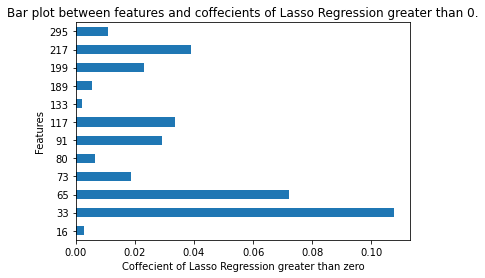

In [8]:
coefficients = grid_search.best_estimator_.coef_

# the importance of a feature is it's absolute value of it's coffecient.

importance = np.abs(coefficients)
imp_features = np.array(x.columns)[importance > 0]
discarded_features = np.array(x.columns)[importance == 0]

print("Number of features discarded with coffecients of Lasso Regression equals 0: ", len(discarded_features))
print("*"*100)
print("Number of Important features with coffecients of Lasso Regression greater than 0: ", len(imp_features))
print("*"*100)


feat_importances = pd.Series(importance[importance > 0],imp_features)
feat_importances.plot(kind="barh")
plt.title("Bar plot between features and coffecients of Lasso Regression greater than 0.")
plt.xlabel("Coffecient of Lasso Regression greater than zero")
plt.ylabel("Features")
plt.show()


In [9]:
## Saving the important features given by Lasso Regression.
np.save("important_fea",imp_features)

In [10]:
np.load("important_fea.npy",allow_pickle=True)

array(['16', '33', '65', '73', '80', '91', '117', '133', '189', '199',
       '217', '295'], dtype=object)

In [11]:
# selecting the important features from the train data

x_fea_imp_using_lasso = x.loc[:,imp_features]
print("Shape of train data after selecting the important features:", x_fea_imp_using_lasso.shape)

# selecting the important features from the train data

test_fea_imp_using_lasso = test_df.drop(columns=["id"]).loc[:,imp_features]
print("Shape of test data after selecting the important features:", test_fea_imp_using_lasso.shape)


Shape of train data after selecting the important features: (250, 12)
Shape of test data after selecting the important features: (19750, 12)


In [44]:
apply_models(x_fea_imp_using_lasso,y,test_fea_imp_using_lasso,test_df.id.values,"modelling_on_fea_imp_using_lasso")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Lasso_Regression:  0.9184722222222222
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Ridge_Regression:  0.9184722222222222
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.01, '

In [50]:
table = PrettyTable()
table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 0.91,0.848])
table.add_row(["Ridge Regression", 0.91,0.848])
table.add_row(["ElasticNet Regression", 0.91,0.848])
table.add_row(["LASSOCV regression", 0.91, 0.848])
table.add_row(["LARSCV",0.91,0.848])
table.add_row(["Bayesian Ridge regression ", 0.91, 0.847])
table.add_row(["ARD regression", 0.91, 0.852])
table.add_row(["Guassian NB", 0.75, 0.672])
table.add_row(["Logistic regression", 0.91, 0.845])
table.add_row(["SVC", 0.5, 0.50])
table.add_row(["huber_regressor", 0.91, 0.848])

print(table)

+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         0.91        |       0.848        |
|      Ridge Regression      |         0.91        |       0.848        |
|   ElasticNet Regression    |         0.91        |       0.848        |
|     LASSOCV regression     |         0.91        |       0.848        |
|           LARSCV           |         0.91        |       0.848        |
| Bayesian Ridge regression  |         0.91        |       0.847        |
|       ARD regression       |         0.91        |       0.852        |
|        Guassian NB         |         0.75        |       0.672        |
|    Logistic regression     |         0.91        |       0.845        |
|            SVC             |         0.5         |        0.5         |
|      huber_regressor       |        

- Feature Importance with Lasso regressor has worked really as it has improved the roc-auc score for all the models.
- The best au-roc score achieved by **ARD regression:0.852** on test data.

## 4.8 Modelling on data with RFE feature importance.

In [95]:
from sklearn.feature_selection import RFECV

# using logistic regression as base estimator

params_lr = {"penalty":["l1","l2"], "C":[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
            "class_weight":["balanced",None]}
lr = LogisticRegression(solver = "liblinear")

grid_search = GridSearchCV(lr,param_grid=params_lr,cv=10,n_jobs=-1,scoring="roc_auc").fit(x,y)

rfecv = RFECV(estimator=grid_search.best_estimator_, step=1, cv=10, scoring='roc_auc')
rfecv.fit(x, y)

RFECV(cv=10,
      estimator=LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
      scoring='roc_auc')

Optimal number of features, as per decided by RFECV: 6


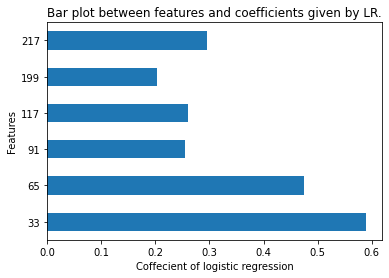

In [123]:
print('Optimal number of features, as per decided by RFECV: {}'.format(rfecv.n_features_))

imp_features = np.where(rfecv.support_==True)[0]

importance = np.abs(rfecv.estimator_.coef_[0])

feat_importances = pd.Series(importance,imp_features)

feat_importances.plot(kind="barh")
plt.title("Bar plot between features and coefficients given by LR.")
plt.xlabel("Coffecient of logistic regression")
plt.ylabel("Features")
plt.show()


In [125]:
x_fea_imp_using_rfe_lr = x.iloc[:,list(np.where(rfecv.support_==True)[0])]

print("Shape of train data after selecting the important features:", x_fea_imp_using_rfe_lr.shape)

test_fea_imp_using_rfe_lr = test_df.drop(columns=["id"]).iloc[:,list(np.where(rfecv.support_==True)[0])]
print("Shape of test data after selecting the important features:", test_fea_imp_using_rfe_lr.shape)


Shape of train data after selecting the important features: (250, 6)
Shape of test data after selecting the important features: (19750, 6)


In [127]:
apply_models(x_fea_imp_using_rfe_lr,y,test_fea_imp_using_rfe_lr,test_df.id.values,"modelling_on_fea_imp_using_rfe_lr")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Lasso_Regression:  0.8725694444444444
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Ridge_Regression:  0.8725694444444444
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.1, 'l

In [129]:
table = PrettyTable()
table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 0.87,0.835])
table.add_row(["Ridge Regression", 0.87,0.835])
table.add_row(["ElasticNet Regression", 0.87,0.835])
table.add_row(["LASSOCV regression", 0.87, 0.835])
table.add_row(["LARSCV",0.87,0.835])
table.add_row(["Bayesian Ridge regression ", 0.87, 0.835])
table.add_row(["ARD regression", 0.87, 0.836])
table.add_row(["Guassian NB", 0.68, 0.672])
table.add_row(["Logistic regression", 0.87, 0.635])
table.add_row(["SVC", 0.85, 0.73])
table.add_row(["huber_regressor", 0.87, 0.835])

print(table)

+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         0.87        |       0.835        |
|      Ridge Regression      |         0.87        |       0.835        |
|   ElasticNet Regression    |         0.87        |       0.835        |
|     LASSOCV regression     |         0.87        |       0.835        |
|           LARSCV           |         0.87        |       0.835        |
| Bayesian Ridge regression  |         0.87        |       0.835        |
|       ARD regression       |         0.87        |       0.836        |
|        Guassian NB         |         0.68        |       0.672        |
|    Logistic regression     |         0.87        |       0.635        |
|            SVC             |         0.85        |        0.73        |
|      huber_regressor       |        

- it has dropped the score for all the models.

## 4.9 Modelling on data with Forward feature selection feature importance.

In [148]:
from sklearn.feature_selection import SequentialFeatureSelector
# using logistic regression as base estimator

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),n_jobs=-1,scoring="roc_auc")
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LogisticRegression(), n_jobs=-1,
                          scoring='roc_auc')

In [159]:
print('Optimal number of features, as per selected by Sequential feature selector : {}'.format(sfs.n_features_to_select_))

print("*"*100)

x_fea_imp_using_ffs = x.loc[:,(x.columns[sfs.support_==True])]

print("Shape of train data after selecting the important features:", x_fea_imp_using_ffs.shape)

test_fea_imp_using_ffs = test_df.drop(columns=["id"]).loc[:,(x.columns[sfs.support_==True])]
print("Shape of test data after selecting the important features:", test_fea_imp_using_ffs.shape)


Optimal number of features, as per selected by Sequential feature selector : 150
****************************************************************************************************
Shape of train data after selecting the important features: (250, 150)
Shape of test data after selecting the important features: (19750, 150)


In [162]:
apply_models(x_fea_imp_using_ffs,y,test_fea_imp_using_ffs,test_df.id.values,"modelling_on_fea_imp_using_ffs")

****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.05}
ROC achieved on train set using Lasso_Regression:  0.9015972222222223
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.8300000000000001}
ROC achieved on train set using Ridge_Regression:  0.9997916666666667
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {

In [163]:
table = PrettyTable()
table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 0.90,0.844])
table.add_row(["Ridge Regression", 0.99,0.715])
table.add_row(["ElasticNet Regression", 0.90,0.844])
table.add_row(["LASSOCV regression", 0.97, 0.842])
table.add_row(["LARSCV",0.97,0.839])
table.add_row(["Bayesian Ridge regression ", 0.99, 0.773])
table.add_row(["ARD regression", 0.98, 0.801])
table.add_row(["Guassian NB", 0.89, 0.64])
table.add_row(["Logistic regression", 1.0, 0.75])
table.add_row(["SVC", 0.99, 0.676])
table.add_row(["huber_regressor", 0.97, 0.72])

print(table)

+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         0.9         |       0.844        |
|      Ridge Regression      |         0.99        |       0.715        |
|   ElasticNet Regression    |         0.9         |       0.844        |
|     LASSOCV regression     |         0.97        |       0.842        |
|           LARSCV           |         0.97        |       0.839        |
| Bayesian Ridge regression  |         0.99        |       0.773        |
|       ARD regression       |         0.98        |       0.801        |
|        Guassian NB         |         0.89        |        0.64        |
|    Logistic regression     |         1.0         |        0.75        |
|            SVC             |         0.99        |       0.676        |
|      huber_regressor       |        

- Perform okayish

## 5. Psedo-labelling | Semi-Supervised Learning.

In [14]:
## define Logistic Regression
params_lr = {"penalty":["l1","l2"], "C":[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
            "class_weight":["balanced",None]}

lr = LogisticRegression(solver = "liblinear")

grid_search = GridSearchCV(lr,param_grid=params_lr,cv=10,n_jobs=-1,scoring="roc_auc").fit(x_fea_imp_using_lasso,y)

In [34]:

sample_rate = 0.2
num_of_samples = int(len(test_fea_imp_using_lasso) * sample_rate)
print("Number of Samples: ",num_of_samples)

# Train the model and creat the pseudo-labels
#grid_search.best_estimator_.fit(x_fea_imp_using_lasso,y)
model = linear_model.ARDRegression().fit(x_fea_imp_using_lasso,y)
#pseudo_labels = grid_search.best_estimator_.predict(test_fea_imp_using_lasso)
pseudo_labels = model.predict(test_fea_imp_using_lasso)

pseudo_labels[pseudo_labels >=0.5] = 1
pseudo_labels[pseudo_labels <0.5] = 0
print(pseudo_labels[:10])

# Add the pseudo-labels to the test set
pseudo_data = test_fea_imp_using_lasso.copy(deep=True)
print(pseudo_data.shape)
pseudo_data["target"] = pseudo_labels


# Take a subset of the test set with pseudo-labels and append in onto
# the training set
sampled_pseudo_data = pseudo_data.sample(n=num_of_samples)
temp_train = pd.concat([x_fea_imp_using_lasso, y], axis=1)
augemented_train = pd.concat([sampled_pseudo_data, temp_train])

print("Shape of augmented data with sampling rate {}: ".format(sample_rate),augemented_train.shape)



Number of Samples:  3950
[1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
(19750, 12)
Shape of augmented data with sampling rate 0.2:  (4200, 13)


In [21]:
apply_models(augemented_train.drop(columns=["target"]),augemented_train.target.values,test_fea_imp_using_lasso,
             test_df.id.values,"modelling_on_data_using_psedo_labelling")


****************************************************************************************************
Applying Lasso_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Lasso_Regression:  0.9934496622382316
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying Ridge_Regression....
Best Hyper-parameters achieved:  {'alpha': 0.0}
ROC achieved on train set using Ridge_Regression:  0.9934496622382316
Predicting on test data and saving the results.
DONE!!
****************************************************************************************************


****************************************************************************************************
Applying ElasticNet_Regression....
Best Hyper-parameters achieved:  {'alpha': 1.0, 'l

In [22]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["Model", "train_roc_auc_score", "test_roc_auc_score"]
table.add_row(["Lasso Regression", 0.90,0.851])
table.add_row(["Ridge Regression", 0.99,0.851])
table.add_row(["ElasticNet Regression", 0.90,0.851])
table.add_row(["LASSOCV regression", 0.97, 0.851])
table.add_row(["LARSCV",0.97,0.851])
table.add_row(["Bayesian Ridge regression ", 0.99, 0.851])
table.add_row(["ARD regression", 0.98, 0.852])
table.add_row(["Guassian NB", 0.89, 0.603])
table.add_row(["Logistic regression", 1.0, 0.852])
table.add_row(["SVC", 0.99, 0.747])
table.add_row(["huber_regressor", 0.97, 0.851])

print(table)

+----------------------------+---------------------+--------------------+
|           Model            | train_roc_auc_score | test_roc_auc_score |
+----------------------------+---------------------+--------------------+
|      Lasso Regression      |         0.9         |       0.851        |
|      Ridge Regression      |         0.99        |       0.851        |
|   ElasticNet Regression    |         0.9         |       0.851        |
|     LASSOCV regression     |         0.97        |       0.851        |
|           LARSCV           |         0.97        |       0.851        |
| Bayesian Ridge regression  |         0.99        |       0.851        |
|       ARD regression       |         0.98        |       0.852        |
|        Guassian NB         |         0.89        |       0.603        |
|    Logistic regression     |         1.0         |       0.852        |
|            SVC             |         0.99        |       0.747        |
|      huber_regressor       |        

- It has improved almost all models a bit. But, still the best roc score achieved is **0.852**.

# 6. Final Results

- Best ROC-AUC score achieved **0.852** on test set by  ARD regressor using Lasso Feature Importance.
- This best score is in **top 5% of the kaggle leaderboard score.**

![alt text](kaggle_score.png "Title")

In [14]:
# Saving the best model
import pickle

model = linear_model.ARDRegression().fit(x_fea_imp_using_lasso,y)


pickle.dump(model, open("best_model", 'wb'))
